# Leaving no one behind during times of crisis
---
### Exploratory analysis of how unemployment contributes to undernourishment
- Data used: 
 - https://www.gapminder.org/data/
 - https://ourworldindata.org/search?q=corona+

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# importing data

aged_25_54  = pd.read_csv('aged_25_54_unemployment_rate_percent.csv')
aged_55_64  = pd.read_csv('aged_55_64_unemployment_rate_percent.csv')
aged_65plus = pd.read_csv('aged_65plus_unemployment_rate_percent.csv')
underNou    = pd.read_csv('sn_itk_defc_zs.csv')
income      = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
covid       = pd.read_csv('daily-covid-cases-3-day-average.csv')
dwi         = pd.read_csv('DJI.csv')
dax         = pd.read_csv('DAX.csv')

## Pandemic-induced economic crisis
---

In [4]:
countries   = ['Germany','United States','France',"China","Italy","Spain","South Korea"]
dwi['Date'] = pd.to_datetime(dwi['Date'])
dax['Date'] = pd.to_datetime(dax['Date'])

In [5]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid.columns = ['Country','Code','Date','Daily new confirmed cases of COVID-19 (rolling 3-day average)']

In [6]:
df_final = pd.DataFrame()
for i,j in enumerate(countries):
    a        = covid
    df_final = df_final.append(a[a['Country']==j])

In [7]:
# Filtering to get the correct time
dwi         = dwi.iloc[20:,:]
dax         = dax.iloc[20:,:]

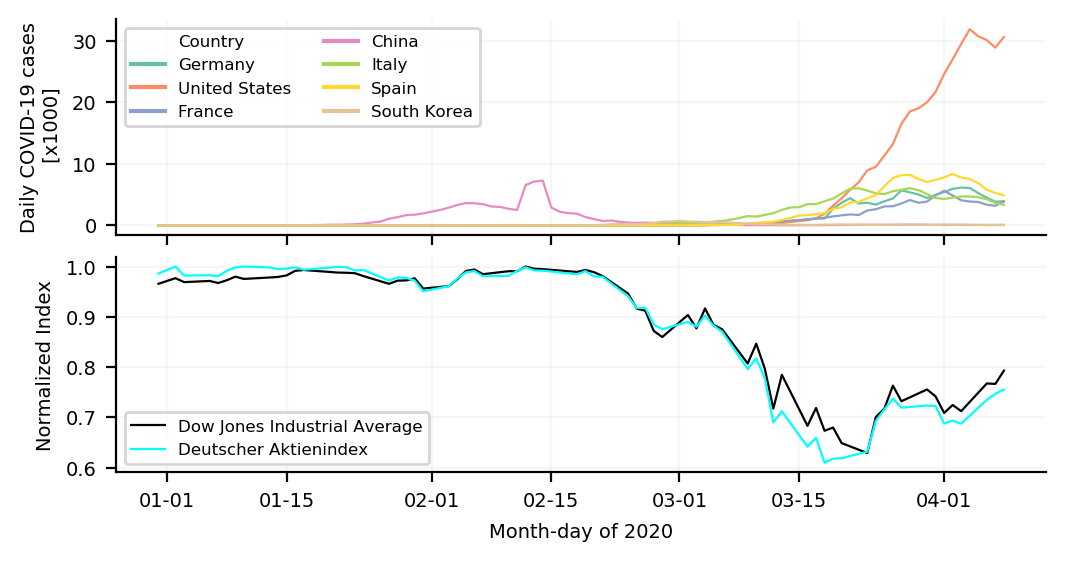

In [8]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(6,3),dpi=200,sharex=True)
sns.lineplot(x=df_final['Date'], y=df_final['Daily new confirmed cases of COVID-19 (rolling 3-day average)']/1000, data=df_final,
             hue='Country',ax=ax1,lw=0.8,palette=sns.color_palette("Set2", 7))
ax1.set_xlabel('Month-day of 2020',fontsize=7)
ax1.set_ylabel("Daily COVID-19 cases\n [x1000]",fontsize=7)
ax1.legend(loc='upper left',fontsize=6,ncol=2)
ax1.tick_params(labelsize=7)
myFmt = mdates.DateFormatter('%m-%d')
ax1.xaxis.set_major_formatter(myFmt)
ax1.grid(alpha=0.1)

sns.lineplot(x=dwi['Date'], y=dwi['Adj Close']/dwi['Adj Close'].max(), data=dwi,
             ax=ax2,lw=0.8,color='k',label='Dow Jones Industrial Average')

sns.lineplot(x=dax['Date'], y=dax['Adj Close']/dax['Adj Close'].max(), data=dax,
             ax=ax2,lw=0.8,color='aqua',label='Deutscher Aktienindex')

ax2.legend(loc='lower left',fontsize=6)
ax2.set_xlabel('Month-day of 2020',fontsize=7)
ax2.set_ylabel("Normalized Index",fontsize=7)
ax2.tick_params(labelsize=7)
myFmt = mdates.DateFormatter('%m-%d')
ax2.xaxis.set_major_formatter(myFmt)
ax2.grid(alpha=0.1)

plt.subplots_adjust(hspace=0.1)
sns.despine()
plt.show()
fig.savefig('DowJonesCovid.png',dpi=300)

## Global look at other economic crisis
---

In [9]:
countries   = ['Colombia','Germany','United States','Ecuador','France','Argentina']

In [10]:
def get_Df(df,val_name,countries):
    df_final = pd.DataFrame()
    for i,j in enumerate(countries):
        a        = pd.melt(df,id_vars='country',var_name='year',value_name=val_name)
        #a        = a.assign(color=Spectral7[i])
        df_final = df_final.append(a[a['country']==j])
        df_final['year'] = pd.to_datetime(df_final['year'])

    return df_final

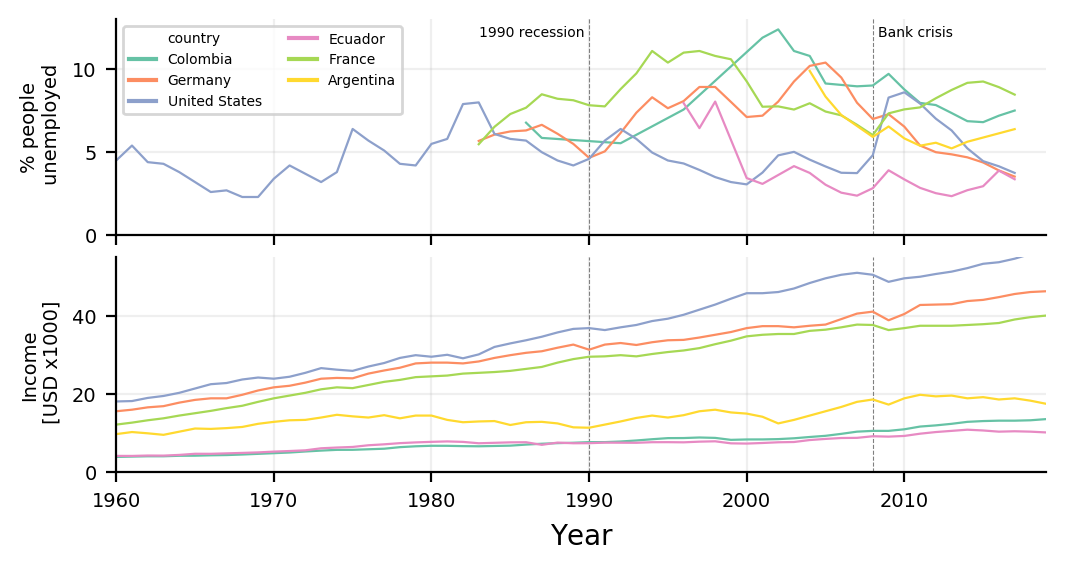

In [11]:
val_names     = ['Unemployment - % people unemployed in age group 25-54','Income']
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(6,3),dpi=200,sharex=True)

to_plot1      = get_Df(aged_25_54,val_names[0],countries)
to_plot2      = get_Df(income,val_names[1],countries)

sns.lineplot(x=to_plot1['year'], y=to_plot1[val_names[0]], data=to_plot1, hue='country',ax=ax1,lw=0.8,palette=sns.color_palette("Set2", 6))
sns.lineplot(x=to_plot2['year'], y=to_plot2[val_names[1]]/1000, data=to_plot2, hue='country',ax=ax2,lw=0.8,palette=sns.color_palette("Set2", 6))

ax1.set_ylabel('% people\n unemployed',fontsize=7)
ax2.set_ylabel('Income\n [USD x1000]',fontsize=7)
ax1.set_xlabel(' ')
ax2.set_xlabel('Year')

ax1.set_xlim(pd.to_datetime('1960'),pd.to_datetime('2019'))
ax2.set_xlim(pd.to_datetime('1960'),pd.to_datetime('2019'))

ax2.set_ylim(0,55)
ax1.set_ylim(0,13)

ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
#ax2.legend(bbox_to_anchor=(1.19,1.15),fontsize=6)
ax1.legend(loc='upper left',fontsize=5,ncol=2)
ax2.get_legend().remove()

ax1.vlines(pd.to_datetime('1990'),0,15,lw=0.4,color='grey',ls='--')
ax2.vlines(pd.to_datetime('1990'),0,55,lw=0.4,color='grey',ls='--')
ax1.vlines(pd.to_datetime('2008'),0,15,lw=0.4,color='grey',ls='--')
ax2.vlines(pd.to_datetime('2008'),0,55,lw=0.4,color='grey',ls='--')
ax1.annotate('1990 recession',(pd.to_datetime('1983'),12),fontsize=5)
#ax1.annotate('Unemployment in age group 25-54',(pd.to_datetime('1960'),13),fontsize=7)
ax1.annotate('Bank crisis',(pd.to_datetime('2008.5'),12),fontsize=5)
ax1.tick_params(labelsize=7)
ax2.tick_params(labelsize=7)
plt.subplots_adjust(hspace=0.1)
sns.despine()

plt.show()
fig.savefig('Unemploy_income.png',dpi=300)

## Can we see a relationship between unemployment and undernourishment
---

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


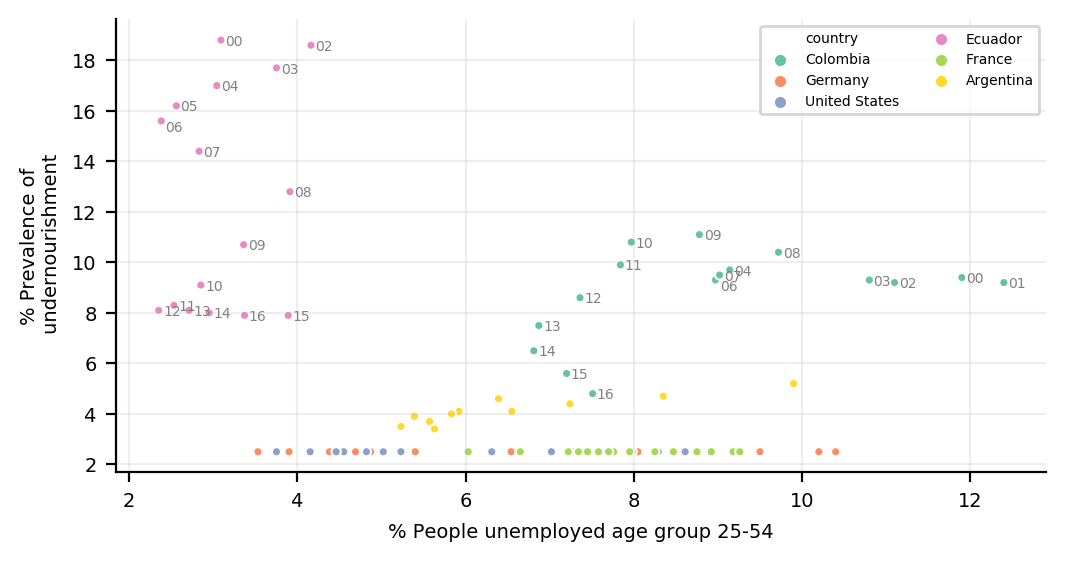

posx and posy should be finite values
posx and posy should be finite values


In [12]:
countries   = ['Colombia','Germany','United States','Ecuador','France','Argentina']
val_names   = ['UnderNour','Unemployment25-54']
fig,ax1 = plt.subplots(1,1,figsize=(6,3),dpi=200,sharex=True)

to_plot1      = get_Df(underNou,val_names[0],countries)
to_plot2      = get_Df(aged_25_54,val_names[1],countries)

df_group = pd.DataFrame()
for j,i in enumerate(countries):
    temp1 = to_plot1.loc[(to_plot1['country']==i) & (to_plot1['year']>'2000-01-01') & (to_plot1['year']<'2019-01-01'),'UnderNour'].values
    temp2 = to_plot2.loc[(to_plot2['country']==i) & (to_plot2['year']>'2000-01-01') & (to_plot2['year']<'2019-01-01'),'Unemployment25-54'].values
    
    if j == 0:
        #print(j)
        #df_group = df_group.assign(year=x)
        df_group = df_group.assign(desnut=temp1)
        df_group = df_group.assign(desemp=temp2)
        df_group = df_group.assign(country=i)
    else:
        #print(j)
        df2   = pd.DataFrame()
        df2    = df2.assign(desnut=temp1)
        df2    = df2.assign(desemp=temp2)
        df2    = df2.assign(country=i)
        df_group = df_group.append(df2)
    
p1 = sns.scatterplot(x=df_group['desemp'], y=df_group['desnut'], data=df_group, hue='country',ax=ax1,lw=0.8,palette=sns.color_palette("Set2", 6),s=11)

years     = ['%s'%(str(i)[2:4]) for i in range(2000,2017)]
countries = ['Colombia','Ecuador']
for c in countries:
    for line in range(0,17):
        if line == 6:
            p1.text(df_group.loc[df_group['country']==c,'desemp'][line]+0.05, df_group.loc[df_group['country']==c,'desnut'][line]-0.4, years[line], 
                    horizontalalignment='left', fontsize=5, color='grey')
            
        else:
            p1.text(df_group.loc[df_group['country']==c,'desemp'][line]+0.05, df_group.loc[df_group['country']==c,'desnut'][line]-0.2, years[line], 
                    horizontalalignment='left', fontsize=5, color='grey')

ax1.tick_params(labelsize=7)
ax1.set_xlabel('% People unemployed age group 25-54',fontsize=7)
ax1.set_ylabel('% Prevalence of\n undernourishment',fontsize=7)
ax1.grid(alpha=0.2)
lgnd = ax1.legend(loc='upper right',fontsize=5,ncol=2,markerscale=0.5)
sns.despine()
plt.show()
fig.savefig('scatter_Unemploy_undernour.png',dpi=300)